In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
from scipy.interpolate import interp1d
from matplotlib import gridspec
from scipy.optimize import curve_fit
from scipy import fftpack
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


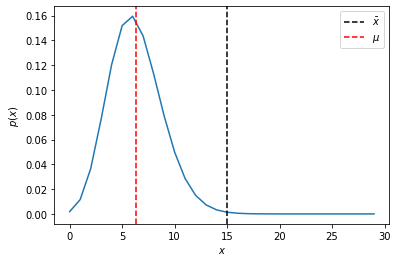

Probability of >15 hurricanes in a year 0.22%


In [ ]:

m =  6.3
sigma = np.sqrt(m)
x_bar = 15
Z = abs(x_bar - m) / sigma
print("Z =", Z)
# make and display plot
k = np.arange(30)
y = stats.poisson.pmf(k, m)
plt.plot(k, y)
plt.axvline(x_bar, linestyle='--', color='black', label=r'$\bar{x}$')
plt.axvline(m, linestyle='--', color='red', label='$\mu$')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

p_15_or_more = (1. - np.sum(stats.poisson.pmf(np.arange(15), m)))*100
print("Probability of >15 hurricanes in a year {:.2f}%".format(p_15_or_more))

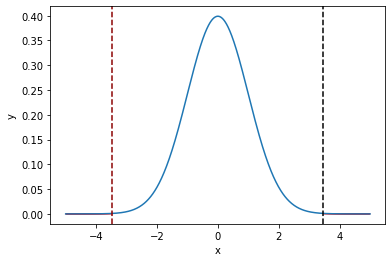

p-value
 significant number


In [ ]:
# pdf plot
xs = np.linspace(-5, +5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='red')
plt.axvline(Z, linestyle='--', color='black')
plt.axvline(-Z, linestyle='--', color='darkred')
plt.ylabel("y")
plt.xlabel("x")
plt.show()

min_limit = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value".format(pvalue))
print("significant number".format(x_bar) if pvalue >= min_limit else " significant number".format(x_bar))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.787


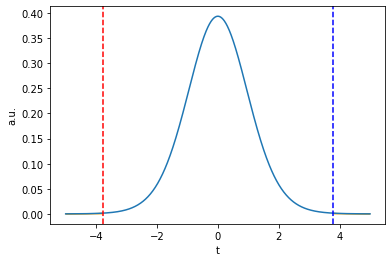

p-value < {GREEK SMALL LETTER ALPHA}/2, s change  within our samples is not  statistically significant


In [ ]:
#writting arrays
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)
xpre = np.mean(pre)
xpost = np.mean(post)
sigma_pre = np.sqrt(np.var(pre, ddof=1)) 
sigma_post = np.sqrt(np.var(post, ddof=1))
# testing 
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)
T = (xpre - xpost) / (sigma * np.sqrt(2/n))
print("T = {:.3f}".format(T))
#display and plot pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, 2*n - 2)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='orange')
plt.axvline(T, linestyle='--', color='red')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()
# now calculate the p-value.when its double sided
pvalue = stats.t.cdf(T, 2*n - 2) + (1. - stats.t.cdf(-T, 2*n - 2))
print("p-value < ".format(pvalue) + "{GREEK SMALL LETTER ALPHA}/2" + ", s change  within our samples is not "
     +" statistically significant")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [ ]:
data = np.loadtxt('data/populations.txt')
years, hares, lynxes, _ = data.T
plt.figure(figsize=(12,8))
plt.plot(years, hares, 'o-') 
plt.plot(years, lynxes, 'o-') 
plt.legend(('Hare', 'Lynx'))

OSError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy import fftpack
#loading plot for over time
data = np.loadtxt("data/populations.txt")
year, hares, lynxes, carrots = data.T
#dictionary  
d = {
  "data": [lynxes, hares, carrots],
  "names": ['lynxes', 'hares', 'carrots'],
  "c": ['red','rosybrown','darkorange'],
}

#Plot aestetichs x and y
def signal_and_spectrum(x,y,ax,time_step,color, label):
    spectrum = pd.DataFrame(columns=['freq','psd'])
    spectrum['freq'] = fftpack.fftfreq(x.size, d=time_step)
    spectrum['psd'] = np.abs(fftpack.fft(y))
    spectrum = spectrum[spectrum['freq']>=0] #Just semi-positive frequencies, since it's symmetric
    ax[0].plot(x, y, marker="o", alpha=.7, c=color, label=label)
    ax[0].legend() 
    ax[1].plot(spectrum['freq'], spectrum['psd'], marker="o", alpha=.7, c=color, label=label)
    ax[1].legend() 
    ax[1].grid()
    return spectrum
#Plot pseudo-period
fig, ax = plt.subplots(ncols=2,figsize=(15, 6)) 
for i in range(3):
    spectrum = signal_and_spectrum(year, d["data"][i], ax, 1, d["c"][i],d["names"][i])
    second_peak = spectrum.sort_values(['psd'], ascending=False).iloc[1,0]
    print("pseudo-period of %s: %.3f years" %(d["names"][i],1/second_peak) )
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Year")
ax[0].set_title("Lynxes-Hares-Carrots population")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True)) 
ax[1].set_xlabel('Frequency (1/years)')
ax[1].set_ylabel('Power')
ax[1].set_title("Power Spectrum") 

OSError: ignored

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [ ]:
plt.figure(figsize = (10,10))
img = plt.imread('moonlanding.png')
plt.imshow(img, plt.cm.gray)
plt.title('realimage')

FileNotFoundError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
from matplotlib.colors import LogNorm
# USE FT
fft = fftpack.fft2(img)
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(fft), norm=LogNorm(vmin=5))
plt.title('fourier transform')

NameError: ignored

Text(0.5, 1.0, 'Filtered spectrum')

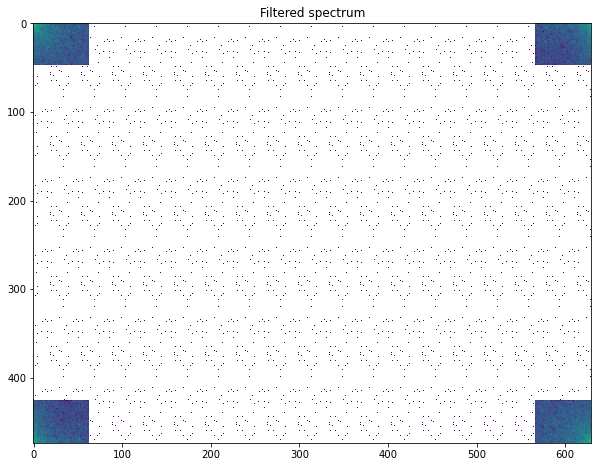

In [ ]:
# using LP filter
ratio = 0.1  # threshold of rows and columns of the spectrum
fft_copy = fft.copy()
##filtred
fft_copy[int(ratio*fft_copy.shape[0]):int((1-ratio)*fft_copy.shape[0]), :] = 0
fft_copy[:, int(ratio*fft_copy.shape[1]):int((1-ratio)*fft_copy.shape[1])] = 0
# display filter
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(fft_copy), norm=LogNorm(vmin=5))
plt.title('filtered spect')

In [ ]:
#                           recontructing image
img_reconstructed = fftpack.ifft2(fft_copy).real
plt.figure(figsize=(14, 14))
plt.imshow(img_reconstructed, plt.cm.gray)
plt.title('Reconstructed image')

NameError: ignored